# 信用卡用户聚类

## 1. 数据预处理

### 1.1 导入数据

In [1]:
import numpy as np
import pandas as pd
#设置不隐藏列
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv('./credit_card.csv')


### 1.2 查看数据

In [2]:
#查看前5行
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#数据维度
data.shape

(8949, 18)

In [4]:
#数据整体情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHA

无缺失值，不需要补充

### 1.3 删除无用变量

In [5]:
data = data.drop(columns='CUST_ID')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8949 entries, 0 to 8948
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

### 1.4 查看数据分布

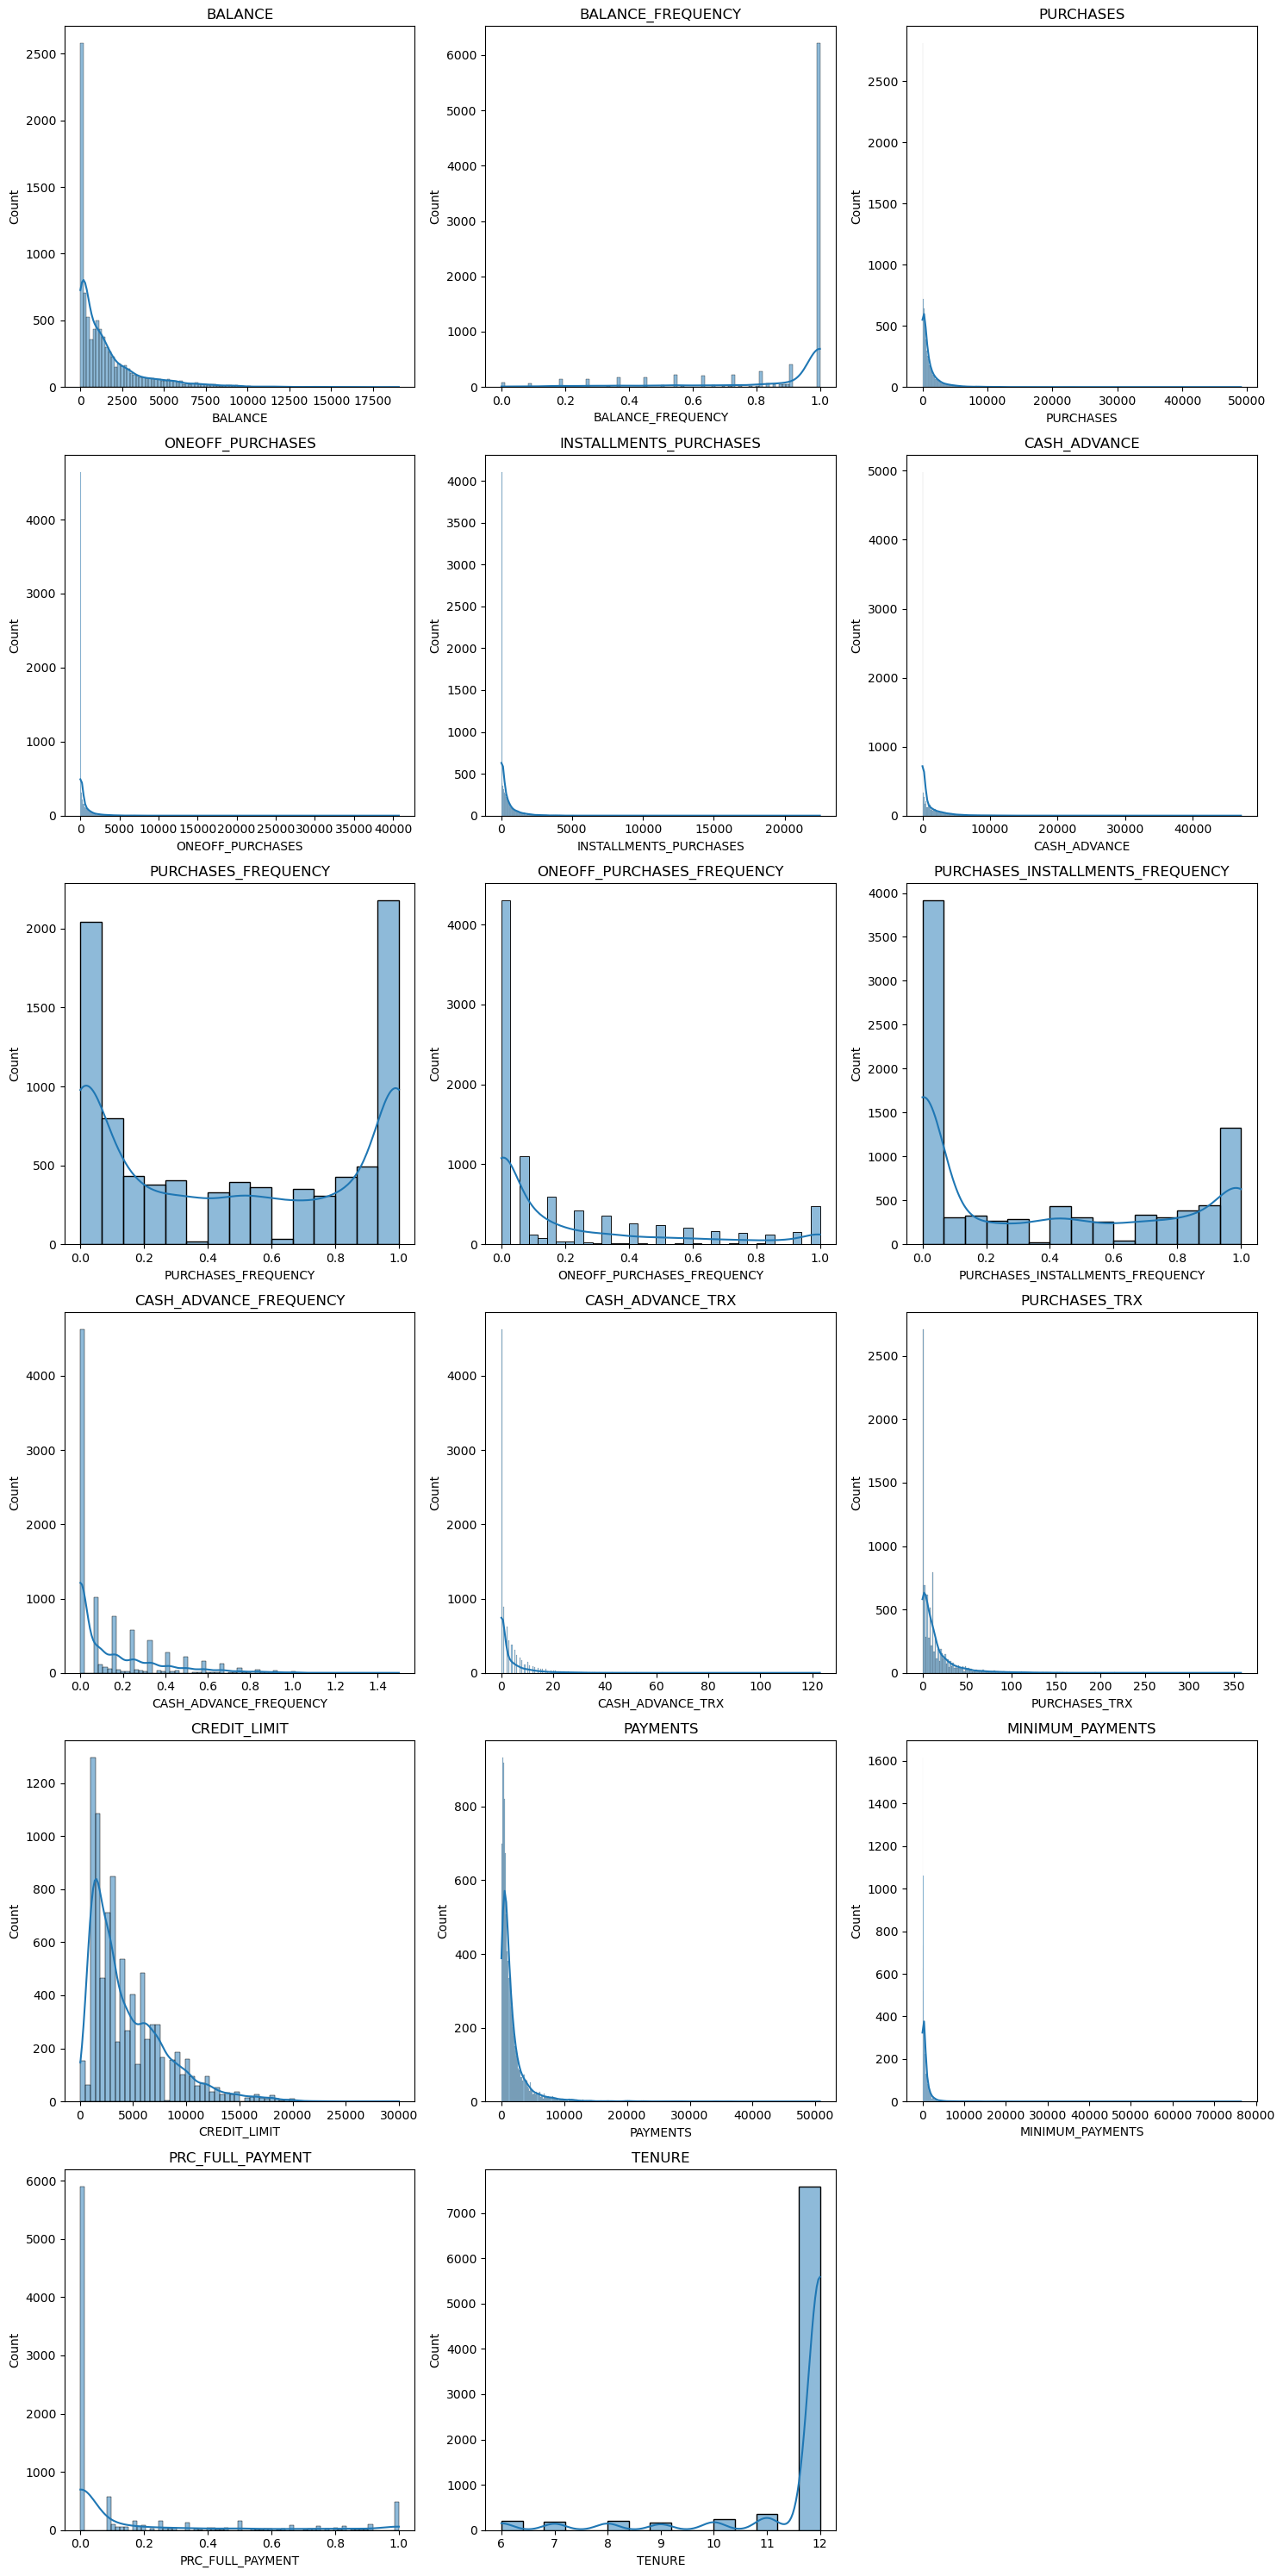

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

graph_by_variables = data.columns
# 动态计算子图的行列数
num_rows = (len(graph_by_variables) + 2) // 3  # 每行有3个图，计算需要多少行

plt.figure(figsize=(15, 5 * num_rows))

for i in range(len(graph_by_variables)):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data[graph_by_variables[i]], kde=True) 
    plt.title(graph_by_variables[i])

plt.tight_layout()
plt.show()

### 1.5 数据标准化

In [7]:
from sklearn.preprocessing import StandardScaler
data_s = StandardScaler().fit_transform(data)
data_s[:2]

array([[-0.73205404, -0.24988139, -0.4249337 , -0.35695651, -0.34911414,
        -0.4668054 , -0.80664908, -0.67871619, -0.70740935, -0.67529446,
        -0.47608293, -0.51138082, -0.96037969, -0.52902627, -0.29733434,
        -0.52558844,  0.36054128],
       [ 0.78685815,  0.1340494 , -0.4695839 , -0.35695651, -0.45460688,
         2.6054375 , -1.22192823, -0.67871619, -0.91708951,  0.57394905,
         0.11003155, -0.59184052,  0.68860056,  0.81854607,  0.10199822,
         0.2341587 ,  0.36054128]])

## 2. K-Means

### 2.1 Kmeans聚类

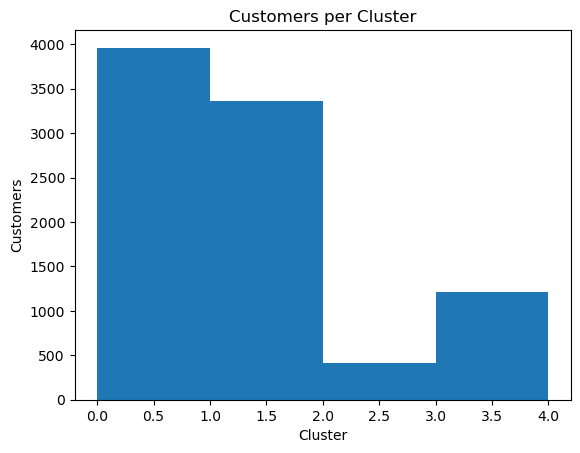

In [8]:
from sklearn.cluster import KMeans
n_clusters=4
kmeans = KMeans(n_clusters=n_clusters, random_state=628)
labels = kmeans.fit_predict(data_s)

plt.hist(labels, bins = range(n_clusters + 1))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

### 2.2 肘部系数

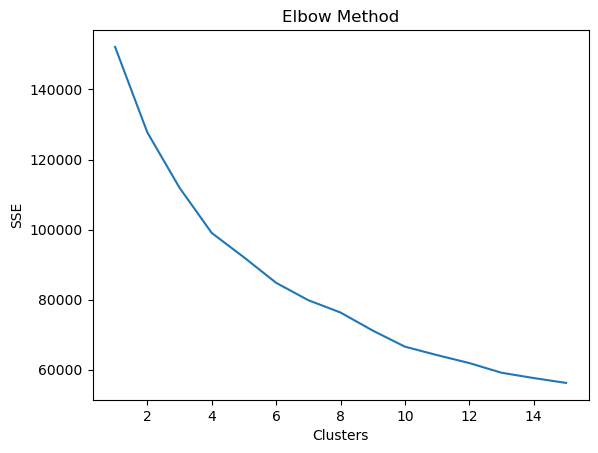

In [9]:
sse = []
cluster_list = range(1,16)
for i in cluster_list:
    kmeans = KMeans(n_clusters=i, random_state=628)
    kmeans.fit(data_s)
    sse.append(kmeans.inertia_)
plt.plot(cluster_list, sse)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

### 2.3 轮廓系数

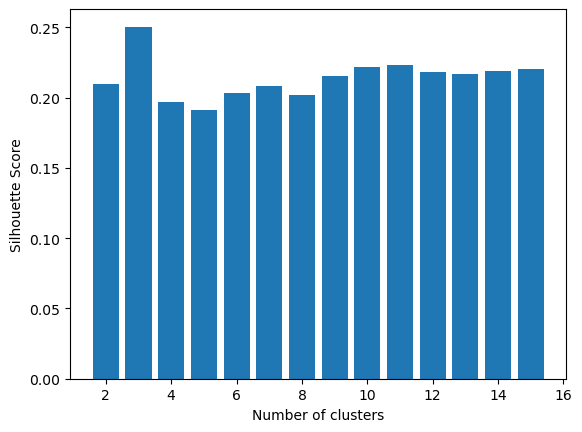

In [10]:
from sklearn.metrics import silhouette_score
s = []
cluster_list = range(2,16)
for i in cluster_list: 
    kmeans = KMeans(n_clusters=i, random_state=628)
    s.append(silhouette_score(data_s, kmeans.fit_predict(data_s)))

plt.bar(cluster_list,s)
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

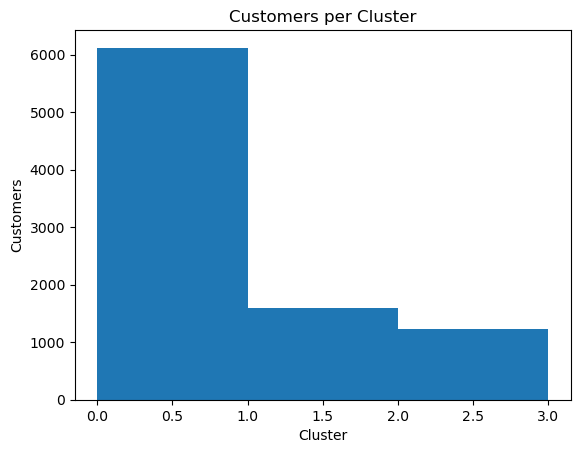

In [11]:
kmeans = KMeans(n_clusters = 3, random_state = 628) 
labels = kmeans.fit_predict(data_s)
data["cluster"] = labels
# plot cluster sizes
plt.hist(labels, bins = range(3+1))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

### 2.4 用户分割

[[-0.367891   -0.17818139 -0.23266069 -0.20427273 -0.1747339  -0.30942392
  -0.06196389 -0.23462312 -0.04767586 -0.33484068 -0.29910836 -0.2432936
  -0.33555925 -0.28464296 -0.13930144  0.00765038 -0.0280247 ]
 [ 1.16068444  0.34241695 -0.29087705 -0.20759117 -0.30645698  1.3759699
  -0.64649061 -0.30741846 -0.5573983   1.55969714  1.33951402 -0.3690019
   0.59670451  0.44322416  0.39705795 -0.41001215 -0.1269818 ]
 [ 0.32127629  0.43975361  1.52851507  1.28021001  1.26174823 -0.24670268
   1.14289765  1.55962503  0.95692172 -0.35839345 -0.25065428  1.68220485
   0.89042818  0.83670606  0.17652256  0.49230123  0.30300974]]


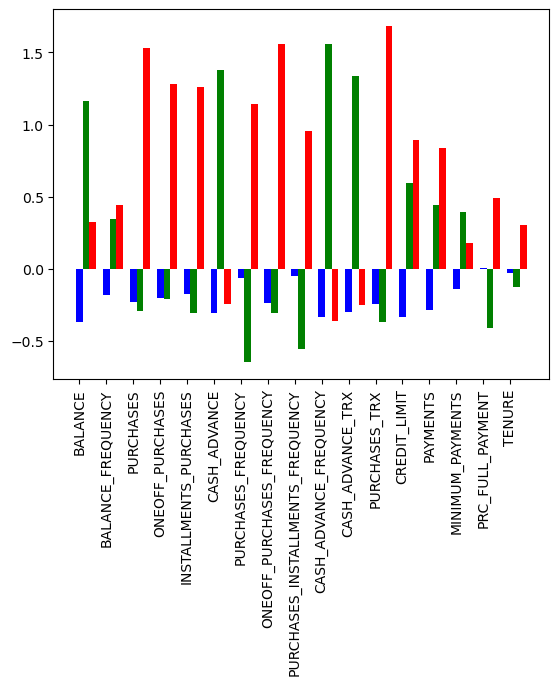

In [12]:
plt.subplot()
centers = kmeans.cluster_centers_
print(centers)
idx = np.arange(17)
plt.bar(idx, centers[0], color = 'b', width = 0.25, tick_label = graph_by_variables)
plt.bar(idx + 0.25, centers[1], color = 'g', width = 0.25)
plt.bar(idx + 0.50, centers[2], color = 'r', width = 0.25)
plt.xticks(rotation = 90)
plt.show()


### 2.5 展示聚类结果

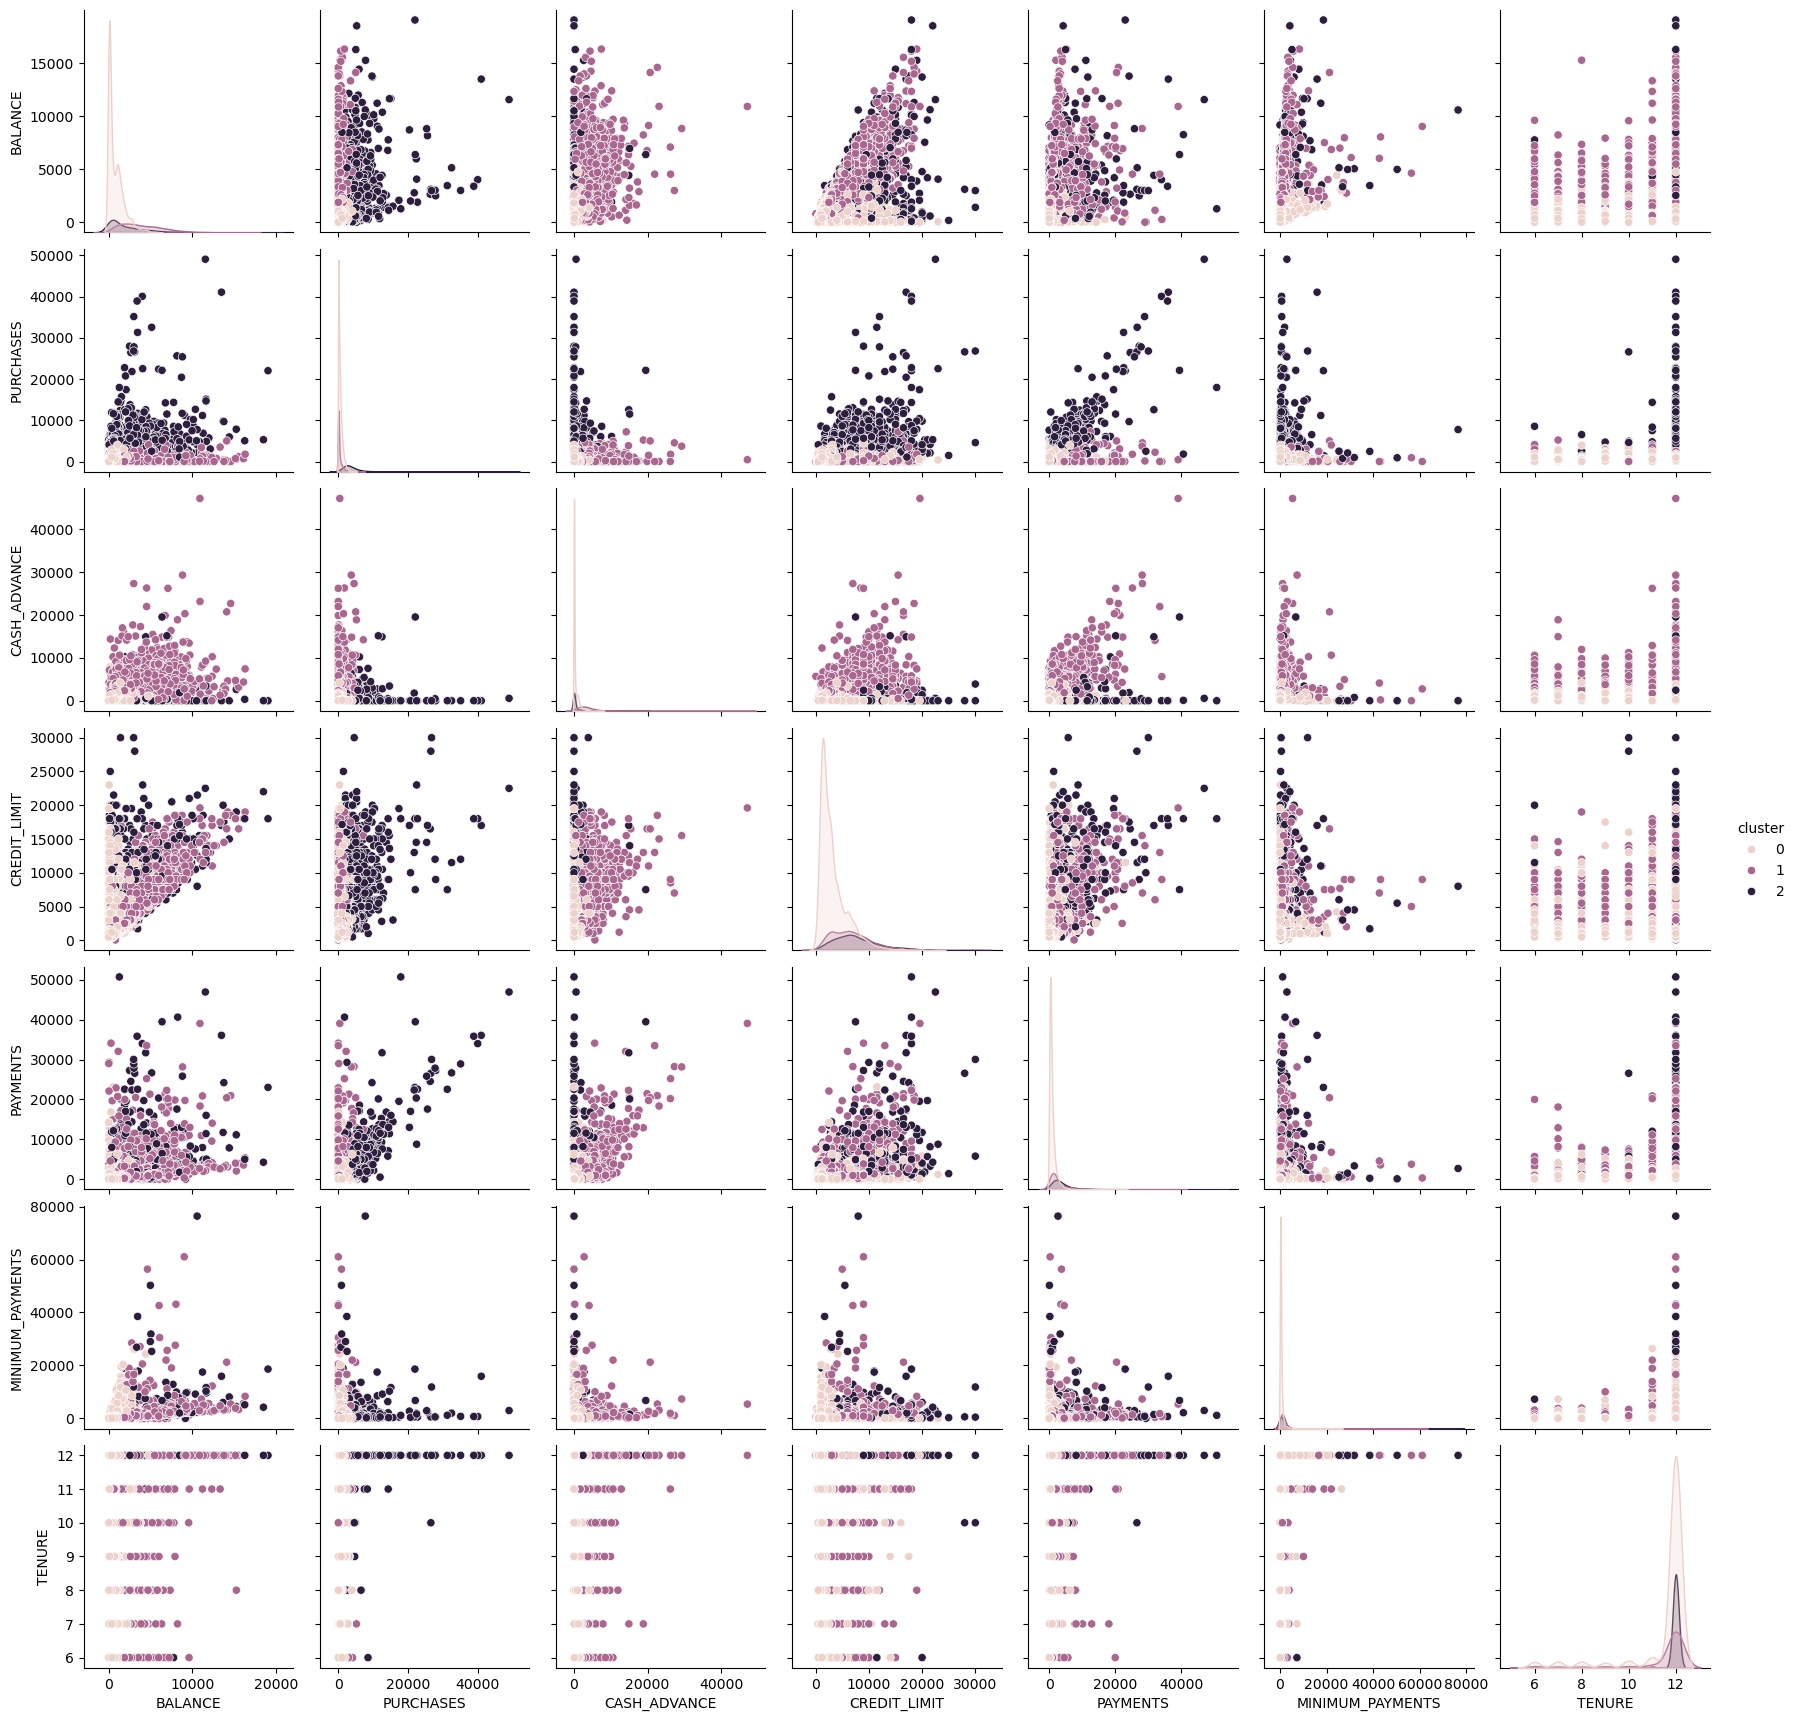

In [13]:
imp_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "TENURE"]
imp_cols.append("cluster")
sns.pairplot(data[imp_cols], hue = "cluster")